# Resumé

Les analyses prédictives dont on situe les séries temporelles ont fait l’objet d’une grande attention au cours des dernières années dans divers domaines. Dans le domaine de la météorologie, l’amélioration remarquable de la qualité des prévisions météorologiques est un des grands succès de la science de l’environnement aux 20e siècle. Ce projet vise à construire un modéle capable de predire la température mensuelle à RABAT. On a suivi une approche de série temporelles en utilisant les modèles AR, MA, ARIMA et SARIMA pour établir d’abord des prédictions des températures, ensuite on applique la méthode de Box et Jenkins afin de trouver le modéle adéquat, ceci est faite en suivant une stratégie classique qui se commence par identification du modèle, puis estimation , validation et Prévision. Enfin, avec cette étude on a pu identifier et choisir la bonne modélisation pour notre série temporelle ainsi que différentes méthodes d’évaluation des modèles et le listage de chaque procédure d’analyse statistique et l’interprétation des résultats obtenus.

# Introduction

### Mots clés

Séries temporelles, modèles de prédiction, autocorrélation, stationnarité, prévisions météorologiques, température.

### La description de données

C'est une base de données de l'historique météorologique de 30 années de 1990 jusqu’à 2020 contenant les températures mensuelles de RABAT, soit en tout 375 observations.

In [65]:
new = pd.read_csv("data.txt",sep=",",header = None)


In [66]:
new

,0
0,date temperature
1,1990-
2,01-31 9.9354838709677
3,1990-
4,02-28 12.478571428571
...,...
750,2020-
751,12-31 11.909677419355
752,2021-
753,01-31 7.2


In [5]:
import pandas as pd
data = pd.read_csv("data.csv")
pd.DataFrame(data["temperature"].describe())

,temperature
count,373.000000
mean,16.697674
std,4.562150
min,7.200000
25%,12.914286
50%,16.390323
75%,21.038710
max,25.674194


Le tableau ci-dessus indique que l'échantillon d'étude est de taille 373 observations, la température minimale durant toute les 30 ans est de 7.2°C, ainsi la valeur maximale est de 16.6°c et la dispersion des valeurs de la température est de 4.5°C.

### Le but de prévisions

Il y a plusieurs raisons pour lesquelles les prévisions météorologiques sont faites. C’est un produit de la science qui a un impact sur la vie de nombreuses personnes. Voici une liste de diverses raisons pour lesquelles ces prévisions sont importantes :
 
1. Aide les gens à se préparer à la façon de s’habiller.
2. Aide les entreprises et les particuliers à planifier la production d’électricité et la quantité d’énergie à utiliser .
3. Aide les personnes ayant des problèmes de santé à planifier la journée (c-à-d. allergies, asthme, stress thermique).
4. Aide les entreprises et les particuliers à planifier les conditions météorologiques extrêmes et autres dangers météorologiques.
5. Aide les agriculteurs et les jardiniers à planifier l’irrigation et la protection des cultures (planification de l’irrigation, protection contre le gel).
6. Aide les gens à connaître les dangers météorologiques extérieurs.
7. Aide les gens à planifier quand faire certaines activités qui sont influencées par les conditions météorologiques.
8. Aide les gens à savoir s’ils doivent partir plus tôt pour le travail.
9. Rendre un avenir incertain un peu plus certain.


### Importation des bibliothéques nécessaires

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#pip install pimdarima
from pmdarima import auto_arima
from pmdarima.arima import ADFTest
from statsmodels.tsa.seasonal import seasonal_decompose

import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Récupéreration du fichier des données 

In [30]:
data = pd.read_csv("data.csv")

# Division des données en un échantillon d'apprentissage et un échantillon de validation

L'échantillon d'apprentissage est constitué par les données de 1990 à 2014 et l'échantillon de validation est constitué par les données de 2014 à 2020

In [32]:
ech_valid = data.iloc[-73:-1]
ech_apprentissage = data.iloc[:-73] 

Les premiers valeurs de l'échantillon de l'apprentissage

In [9]:
ech_apprentissage.head(5)

,date,temperature
0,1990-01-31,9.935484
1,1990-02-28,12.478571
2,1990-03-31,14.635484
3,1990-04-30,13.526667
4,1990-05-31,17.264516


Les premiers valeurs de l'échantillon de validation

In [10]:
ech_valid.head(5)

,date,temperature
300,2015-01-31,9.729032
301,2015-02-28,9.432143
302,2015-03-31,12.216129
303,2015-04-30,15.396667
304,2015-05-31,20.093548


# Créeation un objet de type série temporelle contenant cette série

#### Définir l'index à la date et transformer la colonne date en type date

In [33]:
ech_valid = ech_valid.set_index('date')

ech_valid.index = pd.to_datetime(ech_valid.index)

ech_apprentissage = ech_apprentissage.set_index('date')

ech_apprentissage.index = pd.to_datetime(ech_apprentissage.index)

#### La représentation de la serie

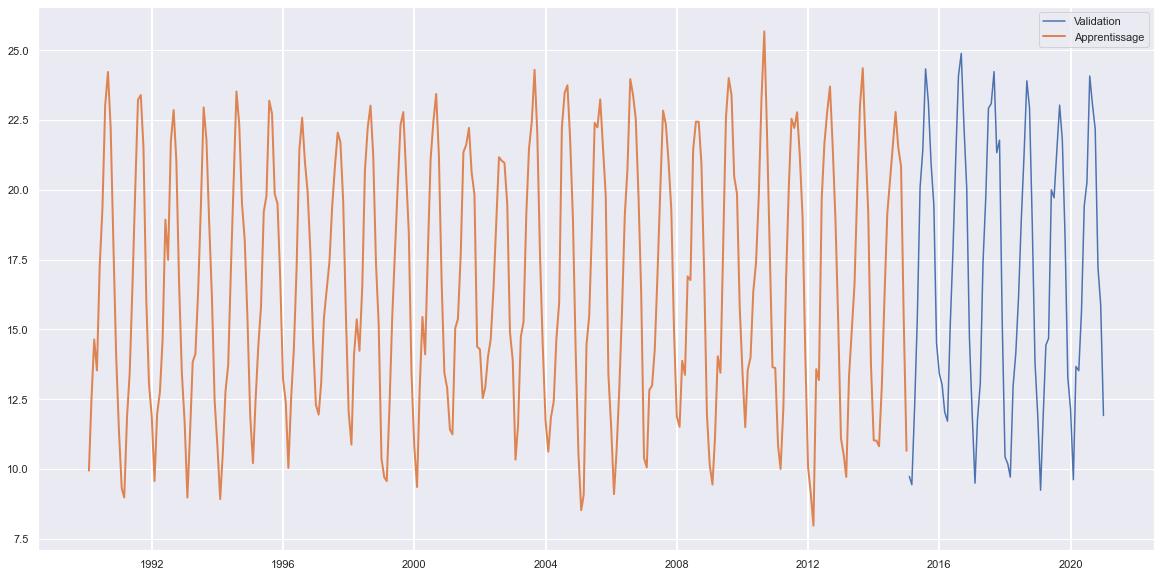

In [34]:
fig = plt.figure(1, figsize=(20,10))
plt.plot(ech_valid,label='Validation')
plt.plot(ech_apprentissage, linewidth=2,label='Apprentissage')
plt.grid(axis = 'x',linewidth=2)
plt.legend()
plt.show()

La figure ci-dessus décrit une série temporelle de température des différents mois de l’année. Le climat est favorable partout durant Mars, Avril, Mai, Juin, Juillet, Août, Septembre, Octobre et novembre. En moyenne, les mois les plus chauds à Rabat sont juillet, Août et septembre avec une température moyenne de 23°c, et les mois les plus froids sont janvier et février avec une temperature 10°c.

Par observation on constate que le modéle est additive

# Stationnarité 

#### le test de Dickey-Fuller augmenté (ADF)

Son but est de tester la stationarité de la tendance<br>
L'hypothese nulle : la serie est non stationaire

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Resultats du test ADF:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test statistique','P-value','Ordre de décalage','Nombre observations'])
    for key,value in dftest[4].items():
        if key == 'Ordre de décalage':
            pass
        else:
            dfoutput['Valeur critique (%s)'%key] = value*1
    print (dfoutput)
    print("\n")
    
    if dftest[0] < dftest[4]["5%"]:
        print("Comme La p-value est inférieur à 0.05 donc on rejette H0, c'est-à-dire la série est stationnaire.")
    else:
        print("Comme La p-value est supérieure à 0.05 On accepte H0, c'est-à-dire la serie est non stationaire.")

In [14]:
adf_test(ech_apprentissage)

Resultats du test ADF:
Test statistique          -3.261230
P-value                    0.016703
Ordre de décalage         11.000000
Nombre observations      288.000000
Valeur critique (1%)      -3.453262
Valeur critique (5%)      -2.871628
Valeur critique (10%)     -2.572146
dtype: float64


Comme La p-value est inférieur à 0.05 donc on rejette H0, c'est-à-dire la série est stationnaire.


# Les composantes de la série

In [23]:
decomposition = seasonal_decompose(ech_apprentissage,model='add')
plt.show(fig)

### La tendance

La composante tendance fait référence à la tendance des données qui s’étend sur plusieurs périodes saisonnières. La série chronologique des températures à Rabat(Maroc) par jour présentée ci-dessous démontre une tendance possiblement sinusoïdale qui s’étend sur toute la période saisonnière de 12 mois.
Les composantes tendance, saisonnière peuvent se combiner de manière additive ou multiplicative.


### La représentation de la tendance

<AxesSubplot:xlabel='date'>

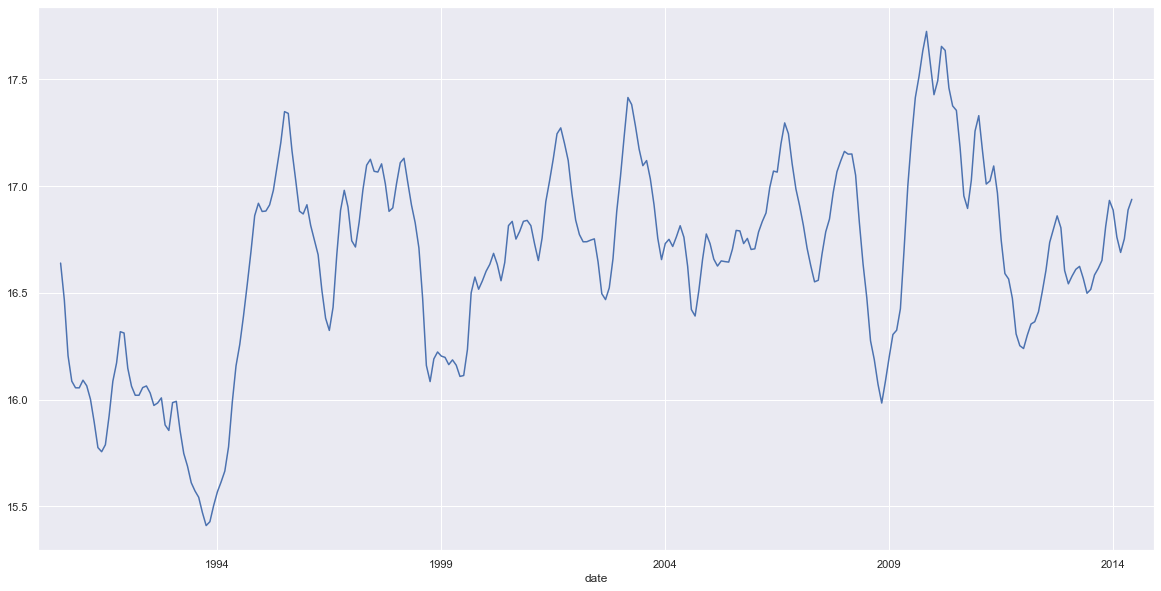

In [24]:
decomposition.trend.plot(figsize=(20,10))

### La représentation de la composante saisonale

Une série chronologique peut contenir plusieurs périodes saisonnières superposées. Dans notre cas, série chronologique de températures mensuelles à une station météorologique. Puisque la Terre tourne autour du soleil, le graphique des températures horaires à une station météorologique montrera une période saisonnière de 12 mois.

<AxesSubplot:xlabel='date'>

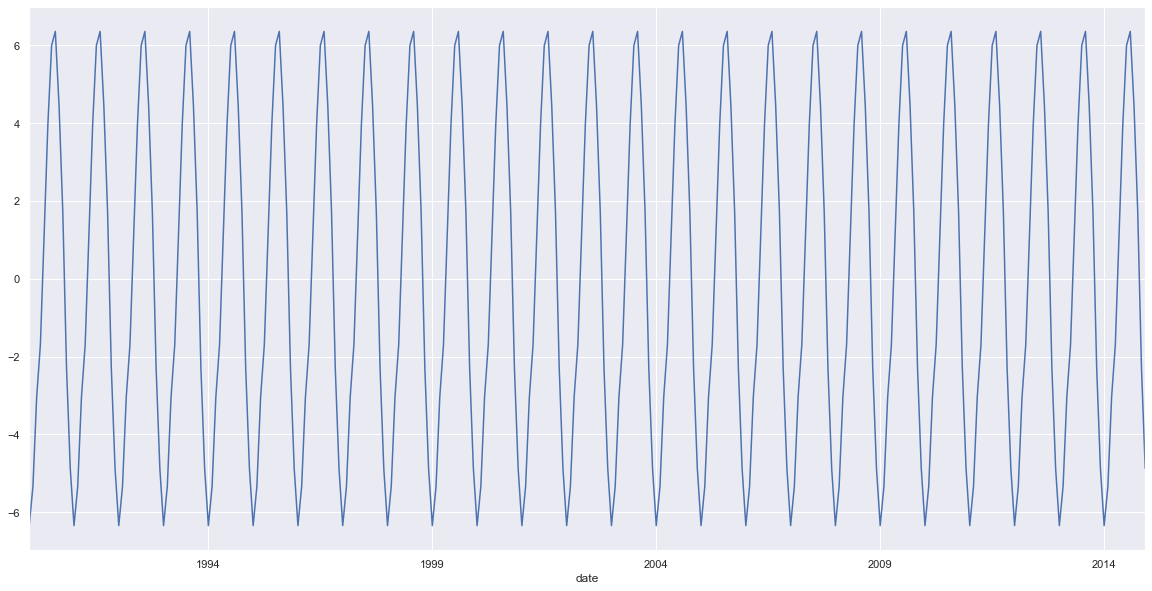

In [18]:
decomposition.seasonal.plot(figsize=(20,10))

### Représentation de tous les composantes de la série

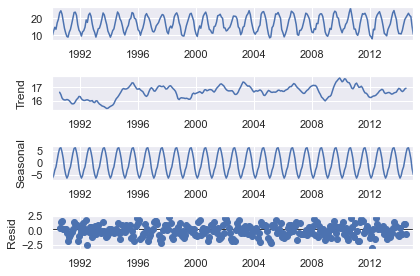

In [49]:
decomposition.plot()
plt.show()

# Les corrélogrammes simple et partiel de la série

#### corrélogrammes simple et partiel de la série avec un ordre de décalage égale à 64

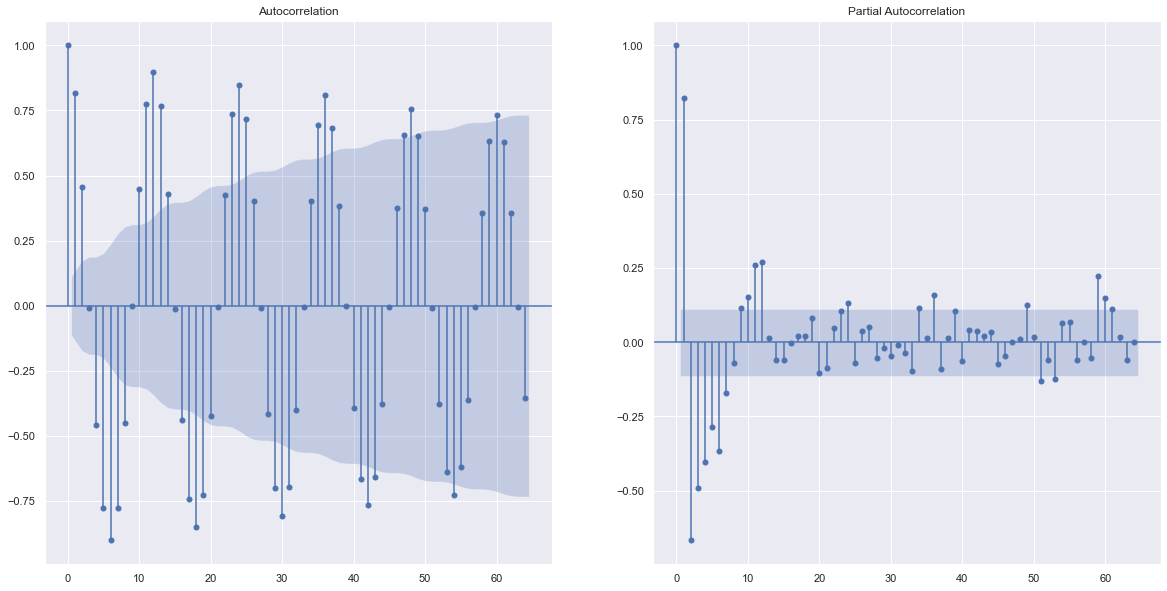

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
fig,ax = plt.subplots(1,2,figsize=(20,10))

sm.graphics.tsa.plot_acf(ech_apprentissage,lags=64,ax=ax[0],label="ui")
sm.graphics.tsa.plot_pacf(ech_apprentissage,lags=64,ax=ax[1])

plt.show()

Pour l'ACF : On constate une valeur importante  au niveau du décalage 1, suivi par un motif en vague atténué qui alterne entre corrélations positive et négative<br>
Pour le PACF : Sur ce diagramme, il existe une corrélation significative positive  au niveau du décalage 1, suivie par des corrélations significatives négatives. Alors on peut dire que ce schéma ne donne pas une idée claire sur le type de modèle, ce qui nécessite de passer à la méthode de box-jenkins, pour identifier les modèles possibles puis choisir le meilleur qui est celui qui représente le mieux les données.    

#### L'ACF et Le PACF pour un ordre de décalge de 12, 24, 36, 48 et 60

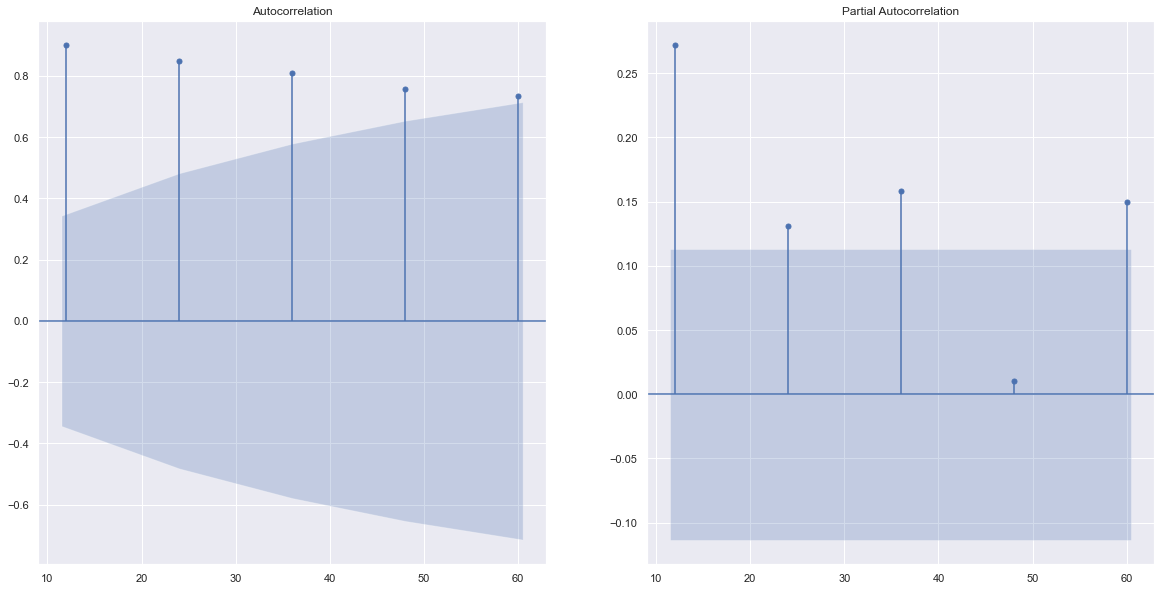

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
fig,ax = plt.subplots(1,2,figsize=(20,10))

sm.graphics.tsa.plot_acf(ech_apprentissage,lags=[12,24,36,48,60],ax=ax[0],label="ui")
sm.graphics.tsa.plot_pacf(ech_apprentissage,lags=[12,24,36,48,60],ax=ax[1])

plt.show()

# La méthodologie de Box and Jenkins

### Identication du modèle ARMA(p,q)

#### le choix de pmax et qmax à partir de l'acf et le pacf

Analyse qualitative : pour Les corréllogrames non saisionier, dans l'acf on a 6 valeurs significative et dans le pacf on a 7, donc on fixe qmax à 6 et pmax à 7
pour Les corréllogrames non saisionier dans l'acf siaspour une seasonalité de 12, l'acf on a 3 valeurs significative et dans le pacf on a 2, donc on fixe Qmax à 3 et Pmax à 2

In [45]:
pmax = 6
qmax = 7

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Boucle dur l'ordre de AR
for p in range(2,pmax):
    # Boucle dur l'ordre de MA
    for q in range(2,qmax):
        try:
            model = SARIMAX(ech_apprentissage, order=(p,0,q),seasonal_order=(1, 1, 1, 12))
            results = model.fit()
            # afficher les valeurs de AIC et BIC du modéle
            print(p, q,"aic =",results.aic,"bic =", results.bic)
        except:
            # n'affiche AIC and BIC quand le moyen mobile n'est pas inversible
            print("p=",p,'q=' ,q, None, None)

2 2 aic = 910.495482114003 bic = 936.1362054749546
2 3 aic = 914.327366237934 bic = 943.6310500790216
2 4 aic = 912.2002788612622 bic = 945.1669231824857
2 5 aic = 910.688092413215 bic = 947.3176972145745
2 6 aic = 905.3248989007508 bic = 945.6174641822462
3 2 aic = 907.8078382026985 bic = 937.1115220437861
3 3 aic = 906.2519269798172 bic = 939.2185713010407
3 4 aic = 909.0663339287997 bic = 945.6959387301592
3 5 aic = 909.8472108371213 bic = 950.1397761186167
3 6 aic = 907.3785707089647 bic = 951.334096470596
4 2 aic = 908.7378230802664 bic = 941.7044674014899
4 3 aic = 908.4541564804443 bic = 945.0837612818038
4 4 aic = 910.4713305425939 bic = 950.7638958240893
4 5 aic = 912.6219085305817 bic = 956.577434292213
4 6 aic = 916.3851801808939 bic = 964.0036664226612
5 2 aic = 908.573400468518 bic = 945.2030052698775
5 3 aic = 912.466245187197 bic = 952.7588104686924
5 4 aic = 912.1305997758592 bic = 956.0861255374905
5 5 aic = 915.4872823661137 bic = 963.105768607881
5 6 aic = 917.340507

Certains modèles sont écartés. On ne retient que les modèles dont les résidus suit une bruit blanc
aic est minimale pour p = 2 et q = 6

### L'entrainement du modéle

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ech_apprentissage,order=(2, 0, 6),seasonal_order=(1, 1, 1, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          temperature   No. Observations:                  300
Model:             SARIMAX(2, 0, 6)x(1, 1, [1], 12)   Log Likelihood                -441.662
Date:                              Sun, 12 Jun 2022   AIC                            905.325
Time:                                      20:31:38   BIC                            945.617
Sample:                                  01-31-1990   HQIC                           921.472
                                       - 12-31-2014                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9289      0.056     16.535      0.000       0.819       1.039
ar.L2         -0.8952      0.050    -17.937      0.000      -0.993      -0.797
ma.L1         -0.5812      0.082     -7.127      0.000      -0.741      -0.421
ma.L2          0.7293      0.086      8.456      0.000       0.560       0.898
ma.L3          0.2314      0.081      2.847      0.004       0.072       0.391
ma.L4          0.1006      0.093      1.085      0.278      -0.081       0.282
ma.L5          0.1087      0.077      1.417      0.156      -0.042       0.259
ma.L6         -0.1021      0.074     -1.383      0.167      -0.247       0.043
ar.S.L12       0.0191      0.073      0.262      0.793      -0.123       0.161
ma.S.L12      -0.8676      0.059    -14.742      0.000      -0.983      -0.752
sigma2         1.1708      0.115     10.164      0.000       0.945       1.397
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.97   Prob(JB):                         0.71
Heteroskedasticity (H):               1.11   Skew:                             0.03
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Le modéle trouvé

$X(t) = 0.92 X(t-1) - 0.89X(t-2) - 0.58a(t-1) + 0.72a(t-2) + 0.23a(t-3) +  0.1a(t-4) +  0.11X(t-5) - 0.11a(t-6)$

### La prediction

In [63]:
start=len(ech_apprentissage)
end=len(ech_apprentissage)+len(ech_valid)-1
predictions = results.predict(start=start, end=end, dynamic=True, typ='levels').rename('Predictions')

### La representation de la prédiction et l'échantillon de test

Pour faire réellement des prédictions, nous devons utiliser la fonction predict et en indiquant l’indice de début et de fin dans lequel nous voulons faire les prédictions.
C’est ici que l'échantillon du test entre en jeu. Nous faisons d’abord une prédiction pour la température sur les données de test. Ensuite, on les trace pour voir comment la prédiction se compare à l'échantillon du test.

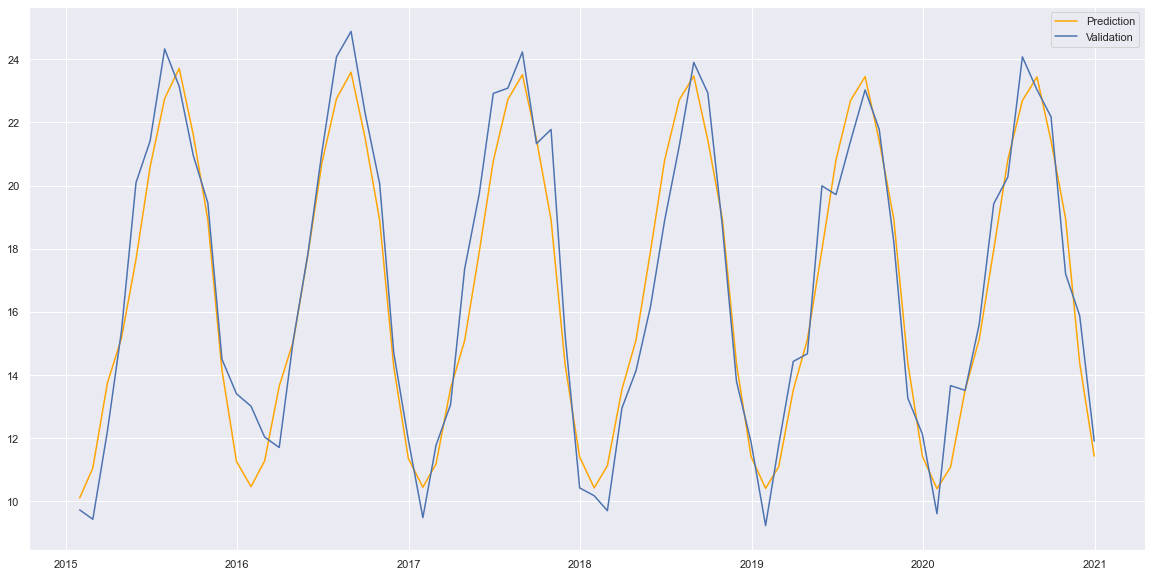

In [64]:
fig = plt.figure(1,figsize=(20,10))

plt.plot(predictions,label="Prediction",color="orange")
plt.plot(ech_valid,label="Validation")
plt.legend()
plt.show()

A partir du graphique, Nous constatons que les prévisions obtenues sont très proches des valeurs des séries chronologiques réelles indiquant un modèle assez précis.


# Evaluation

In [65]:
from sklearn.metrics import mean_squared_error

### MSE

<b> </b>La formule de mean squared error (MSE) :<br>
&nbsp;&nbsp;&nbsp;&nbsp;$MSE = {\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2$<br><br>

où $T$ est la dernière période d’observation et $l$ est le point de décalage jusqu’à $L$ nombre d’observations de test.

In [69]:
MSE = mean_squared_error(ech_valid["temperature"],predictions)
print('MSE error = ', MSE)

MSE error =  1.5007438277444294


### RMSE

<br> </b>La formule de root mean squared error (RMSE)<br>

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{MSE} = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
<br> </b><br>

l'advantage de RMSE est qu'il est exprimé par le méme unité de données

In [67]:
from statsmodels.tools.eval_measures import rmse
rmse = rmse(ech_valid["temperature"], predictions)
print('RMSE Erreur = ', rmse)

RMSE Erreur =  1.2250485001600668


### MAPE

In [84]:
def MAPE(Y,Y_chap):
    return np.mean(np.abs((Y - Y_chap)/Y*len(Y)))

mape = MAPE(ech_valid["temperature"],predictions)
print('MAPE Erreur = ', mape)

MAPE Erreur =  4.615937097907356


### MAD

In [82]:
def MAD(Y,Y_chap):
    return np.mean(np.abs((Y - Y_chap)/len(Y)))

mad = MAD(ech_valid["temperature"],predictions)
print('MAD Erreur = ', mad)

MAD Erreur =  1.4091819462714046 %


Des erreures MAPE, RMSE et MSE faibles donc notre modèle est adéquat

# Conclusion

Ce projet a été très enrichissant pour nous, car il nous a permis d'appliquer les méthodes de prédiction sur des séries temporelles, ses contraintes, et il nous a permis de participer concrètement à ses enjeux à travers des étapes variées de la manipulation de données, comme celle du l’entraînement des modèles et leurs évaluations que nous avons particulièrement apprécié. Ce projet nous a aussi permis de renforcer notre autonomie. Fort de cette expérience et en réponse à ses enjeux, nous aimerions beaucoup par la suite essayer de nager dans le domaine de data science en découvrant des nouvelles technologies et méthodes plus puissantes et plus profondes.

# Réferences

<br> Cours du prof

Site : https://medium.com/

Les données : https://www.meteoblue.com/en/weather/week/rabat_morocco_2538475<br>